In [2]:
import astropy
import numpy as np
import matplotlib
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [3]:
file = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/MG_Bridge_fg/the actual cube!.fits')
file.info()
file[0].header

Filename: /Users/FRANNYPACK/Downloads/grind!/research/Data/MG_Bridge_fg/the actual cube!.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    8376   (2892, 2880, 56)   float32   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 2892                                                  
NAXIS2  =                 2880                                                  
NAXIS3  =                   56                                                  
BLANK   =                   -1  /                                               
BUNIT   = 'K       '                                                            
DATE-OBS= '2020-05-13T22:16:32.9'  /                                            
TELESCOP= 'ASKAP   '  /                                                         
CRPIX1  =    1.56200000000E+03  /                                               
CDELT1  =   -1.94444444444E-03  /                                               
CRVAL1  =    3.77962750000E+

In [19]:
# for getting 2D images of certain velocities of the cube

def get_im(v_val, v, im_title):
    #assigning world coordinate system (for the grid lines)
    wcs = WCS(file[0].header)
    # creating the plot - projection = wcs gives the grid lines and 'slices' is turning the 3d cube into a 2d object 
    ax = plt.subplot(projection = wcs, slices=('x', 'y', v_val))
    im = ax.imshow(file[0].data[v_val,:,:], cmap = 'magma', vmin = 3, vmax = 30)
    plt.grid(b = True, which = 'major', axis = 'both', linewidth = 1, color = 'white')
    plt.xlabel('Right Ascension', fontname = 'Times New Roman', fontsize = 20)
    plt.ylabel('Declination', fontname = 'Times New Roman', fontsize = 20)
    ax.set_title('Velocity = ' + v + ' km/s', fontname = 'Times New Roman', fontsize = 22)
    plt.colorbar(im)
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['text.color'] = 'Black'
    plt.rcParams['font.size'] = '14'
    plt.savefig(im_title)

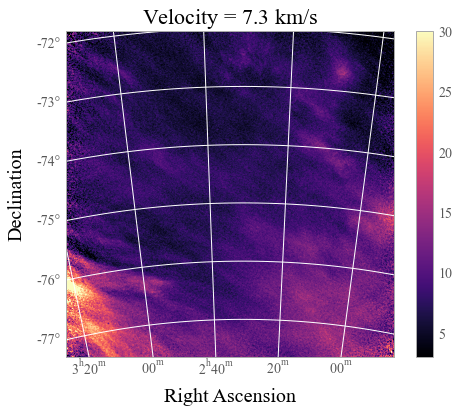

In [21]:
# structure beginning to enter in @ 7.3 km/s

get_im(22, '$\mathregular{7.3}$', 'im_7.3.png')

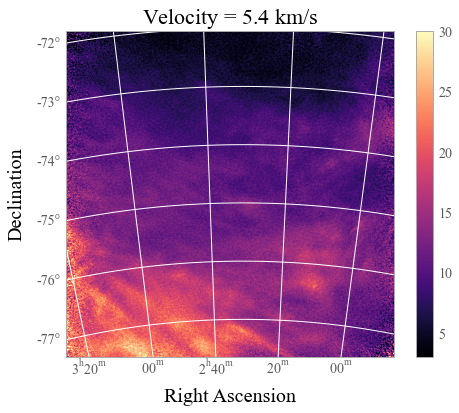

In [25]:
# more structure fills the screen @ 5.4 km/s

get_im(29, '$\mathregular{5.4}$', 'im_5.4.png')

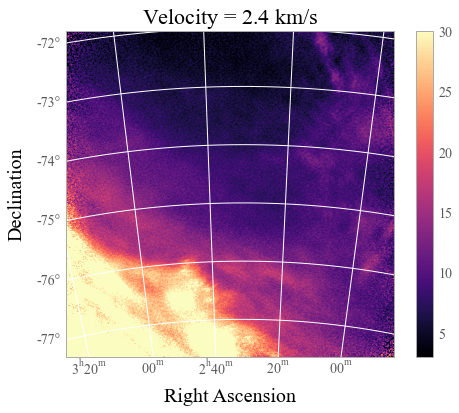

In [22]:
# peak of structure @ 2.4 km/s

get_im(27, '$\mathregular{2.4}$', 'im_2.4.png')

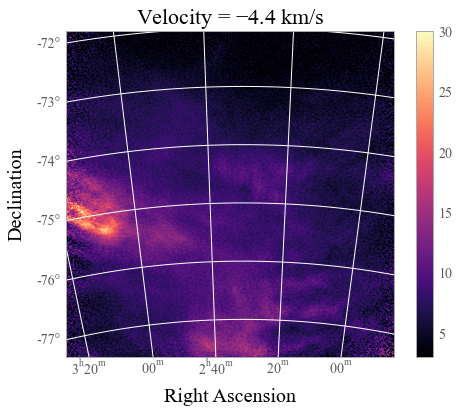

In [23]:
# structure dissipating at -4.4 km/s

get_im(34, '$\mathregular{-4.4}$', 'im_-4.4.png')

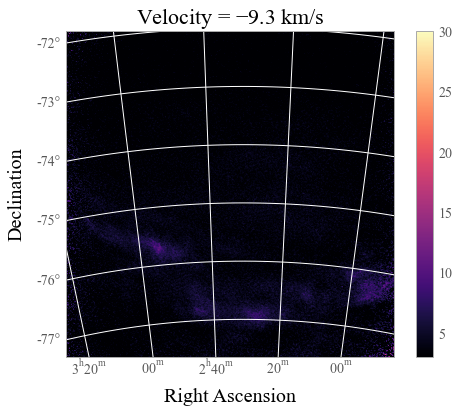

In [24]:
# peak of structure @ -9.3 km/s

get_im(39, '$\mathregular{-9.3}$', 'im_-9.3.png')

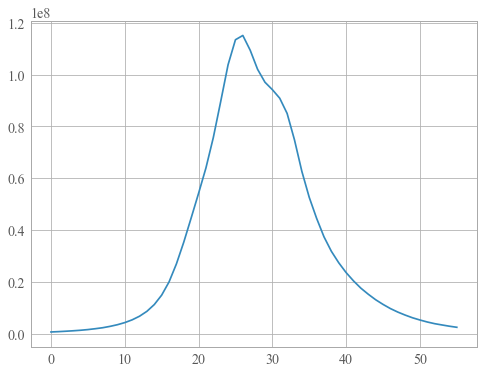

In [27]:
# plot of brightness intensity vs velocity
sum_data = np.sum(np.sum(file[0].data, axis = 1), axis = 1)
plt.plot(sum_data) 

In [28]:
tot_col_dens = 1.82 * (10 ** 18) * np.sum(file[0].data, axis = 0) * 0.977145310429 # in cm^-2, last val = velocity

In [106]:
# function to plot column density given a range of velocities
def get_col_dens(file_name, title, subtitle, save, name):
    wcs = WCS(file[0].header)
    ax = plt.subplot(projection = wcs, slices = ['x','y',1], zorder = -1) # (slices isn't doing anything here)
    plt.grid(b = True, which = 'major', axis = 'both', linewidth = 1, color = 'white', zorder = -1)
    plt.xlabel('Right Ascension', fontname = 'Times New Roman', fontsize = 20)
    plt.ylabel('Declination', fontname = 'Times New Roman', fontsize = 20)
    plt.title(title, y = 1.04, fontname = 'Times New Roman', fontsize = 22)
    plt.suptitle(subtitle, x = 0.45, y = 0.92, fontsize = 12)
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['text.color'] = 'Black'
    plt.rcParams['font.size'] = '14'
    plt.imshow(file_name, cmap = 'magma', vmin = -0.25 * 10 ** 19, vmax = 0.73 * 10 ** 21, zorder = -1)
    plt.colorbar()
    
    if save == True: # saves figure
        plt.savefig(name, bbox_inches='tight')

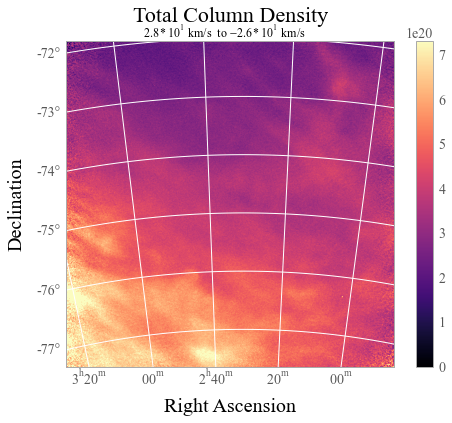

In [111]:
# column density over all the velocity ranges 

get_col_dens(tot_col_dens, 'Total Column Density', '$\mathregular{2.8 * 10^{1}}$ km/s  to $\mathregular{-2.6 * 10^{1}}$ km/s', True, 'MB_cold_tot.png')


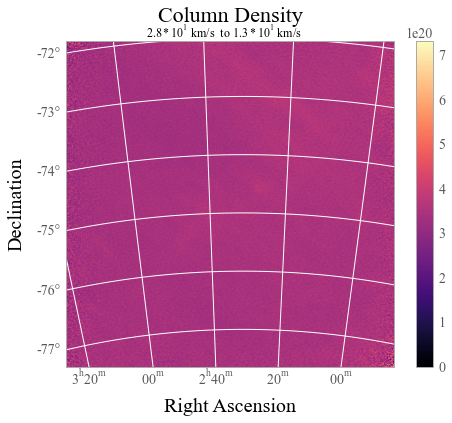

In [108]:
# column density over 2.8 * 10^1 km/s to 1.3 * 10^1 km/s (0th to 22rd index)
# region of velocities where filamentary structures not prominent at all!

col_dens1 = 1.82 * (10 ** 18) * np.nansum(file[0].data[0:16], axis = 0) * 0.977145310429 
get_col_dens(col_dens1, 'Column Density', '$\mathregular{2.8 * 10^{1}}$ km/s  to $\mathregular{1.3 * 10^{1}}$ km/s', False, 'no')
plt.imshow(col_dens1, cmap = 'magma', vmin = -1.5 * 10 ** 20, vmax = 2 * 10 ** 20)

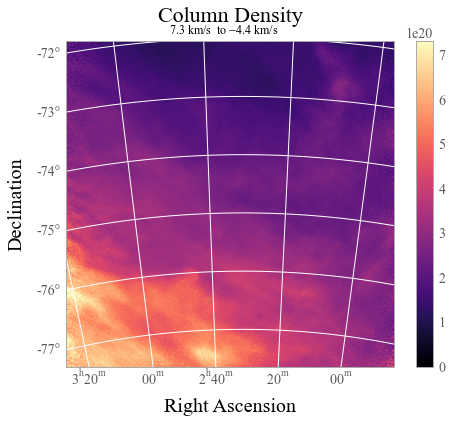

In [109]:
# column density over 7.3 km/s to -4.4 km/s (22nd to 34th index)
# region of velocities where MANY filamentary structures come into play

col_dens2 = 1.82 * (10 ** 18) * np.nansum(file[0].data[22:34,:,:], axis = 0) * 0.977145310429 
get_col_dens(col_dens2, 'Column Density', '$\mathregular{7.3}$ km/s  to $\mathregular{-4.4}$ km/s', False, 'no')
plt.imshow(col_dens2, cmap = 'magma', vmin = 0, vmax = 6 * 10 ** 20)

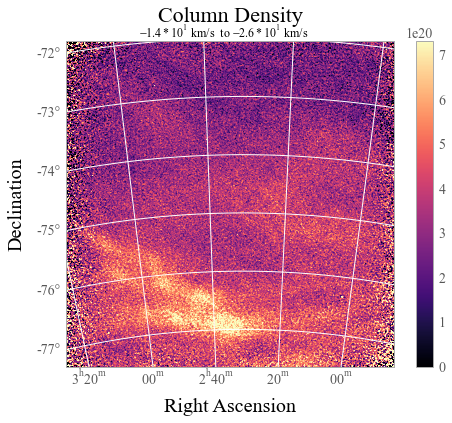

In [110]:
# column density over -1.4 * 10^1 km/s to -2.6 * 10^1 km/s (44th to 56th index)
# region of velocities where filamentary structures not (obviously) prominent at all

col_dens3 = 1.82 * (10 ** 18) * np.nansum(file[0].data[44:56,:,:], axis = 0) * 0.977145310429  
get_col_dens(col_dens3, 'Column Density', '$\mathregular{-1.4 * 10^{1}}$ km/s  to $\mathregular{-2.6 * 10^{1}}$ km/s', False, 'no')
plt.imshow(col_dens3, cmap = 'magma', vmin = -2 * 10 ** 3, vmax = 0.35 * 10 ** 20)